In [20]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

# Audi cars price regressor

In [21]:
#uploding Audu data  
audi=pd.read_csv('./audi.csv') 

In [22]:
audi.head(10)

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,A1,2017,12500,Manual,15735,Petrol,150,55.4,1.4
1,A6,2016,16500,Automatic,36203,Diesel,20,64.2,2.0
2,A1,2016,11000,Manual,29946,Petrol,30,55.4,1.4
3,A4,2017,16800,Automatic,25952,Diesel,145,67.3,2.0
4,A3,2019,17300,Manual,1998,Petrol,145,49.6,1.0
5,A1,2016,13900,Automatic,32260,Petrol,30,58.9,1.4
6,A6,2016,13250,Automatic,76788,Diesel,30,61.4,2.0
7,A4,2016,11750,Manual,75185,Diesel,20,70.6,2.0
8,A3,2015,10200,Manual,46112,Petrol,20,60.1,1.4
9,A1,2016,12000,Manual,22451,Petrol,30,55.4,1.4


In [23]:
audi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10668 entries, 0 to 10667
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         10668 non-null  object 
 1   year          10668 non-null  int64  
 2   price         10668 non-null  int64  
 3   transmission  10668 non-null  object 
 4   mileage       10668 non-null  int64  
 5   fuelType      10668 non-null  object 
 6   tax           10668 non-null  int64  
 7   mpg           10668 non-null  float64
 8   engineSize    10668 non-null  float64
dtypes: float64(2), int64(4), object(3)
memory usage: 750.2+ KB


In [24]:
audi.shape

(10668, 9)

In [7]:
audi.describe()

,year,price,mileage,tax,mpg,engineSize
count,10668.000000,10668.000000,10668.000000,10668.000000,10668.000000,10668.000000
mean,2017.100675,22896.685039,24827.244001,126.011436,50.770022,1.930709
std,2.167494,11714.841888,23505.257205,67.170294,12.949782,0.602957
min,1997.000000,1490.000000,1.000000,0.000000,18.900000,0.000000
25%,2016.000000,15130.750000,5968.750000,125.000000,40.900000,1.500000
50%,2017.000000,20200.000000,19000.000000,145.000000,49.600000,2.000000
75%,2019.000000,27990.000000,36464.500000,145.000000,58.900000,2.000000
max,2020.000000,145000.000000,323000.000000,580.000000,188.300000,6.300000


## An explanation of each feature
* model	- What is the car model
* year - What is the year of manufacture of the vehicle
* price	- What is the price of the car
* transmission - Manual, Automatic or Semi-Auto vehicle 
* mileage - How many miles does the car have
* fuelType	- What type of fuel tank: Petrol or Diesel
* tax - Vehicle tax	
* mpg - Average fuel consumption of the vehicle	
* engineSize - Engine volume of the vehicle

In [8]:
#cheching if ther if Nulls data to full
audi.isnull().sum()

model           0
year            0
price           0
transmission    0
mileage         0
fuelType        0
tax             0
mpg             0
engineSize      0
dtype: int64

[Text(0, 0, ' A1'),
 Text(0, 0, ' A6'),
 Text(0, 0, ' A4'),
 Text(0, 0, ' A3'),
 Text(0, 0, ' Q3'),
 Text(0, 0, ' Q5'),
 Text(0, 0, ' A5'),
 Text(0, 0, ' S4'),
 Text(0, 0, ' Q2'),
 Text(0, 0, ' A7'),
 Text(0, 0, ' TT'),
 Text(0, 0, ' Q7'),
 Text(0, 0, ' RS6'),
 Text(0, 0, ' RS3'),
 Text(0, 0, ' A8'),
 Text(0, 0, ' Q8'),
 Text(0, 0, ' RS4'),
 Text(0, 0, ' RS5'),
 Text(0, 0, ' R8'),
 Text(0, 0, ' SQ5'),
 Text(0, 0, ' S8'),
 Text(0, 0, ' SQ7'),
 Text(0, 0, ' S3'),
 Text(0, 0, ' S5'),
 Text(0, 0, ' A2'),
 Text(0, 0, ' RS7')]

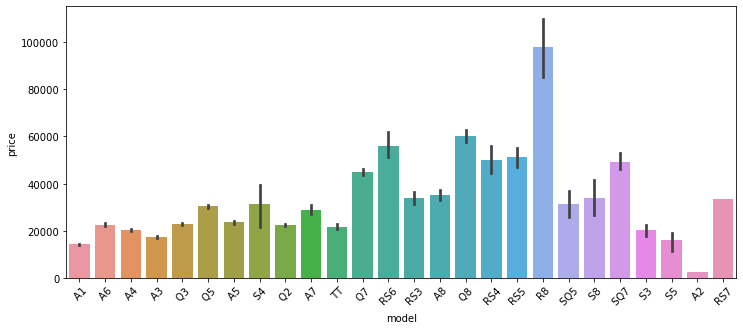

In [11]:

plt.figure(figsize=(12,5))
bar = sns.barplot(data=audi, x='model', y='price')
bar.set_xticklabels(bar.get_xticklabels(), rotation=45)

#### We can see that significantly the highest price is of R8 C and the lowest is of A2

[Text(0.5, 1.0, 'Year vs. Price')]

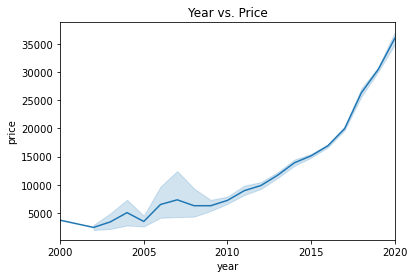

In [25]:
# Audi : Year vs. Price
line = sns.lineplot(data=audi, x='year', y='price')
line.set(xlim=(2000,2020))
line.set_xticks(range(2000,2021,5))
line.set(title='Year vs. Price')

#### We can see that the newer the vehicle, the higher the price

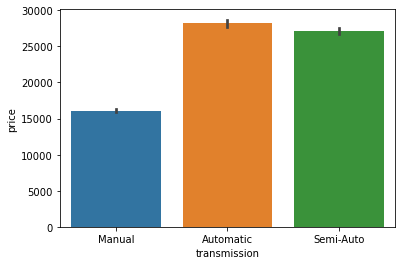

In [13]:
sns.barplot(data=audi, x='transmission', y='price')
plt.savefig('audi_trans_price.png')

#### The prices of manual vehicles are significantly cheaper than the price of automatic or semi-automatic vehicles

Text(0.5, 1.0, 'Mileage vs. Price')

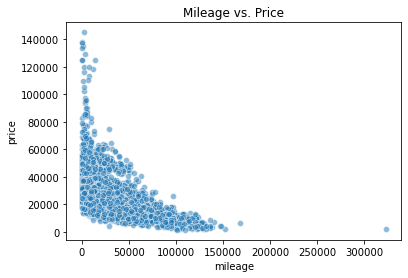

In [26]:
# Mileage vs. Price
sns.scatterplot(data=audi, x='mileage', y='price', alpha=0.5)
plt.savefig('audi_mile_price.png')
ax = plt.gca()
ax.set_title("Mileage vs. Price")

#### Downward trend- The higher the kilometers, the lower the price - you can see the opposite here

Text(0.5, 1.0, 'Mileage vs. Price')

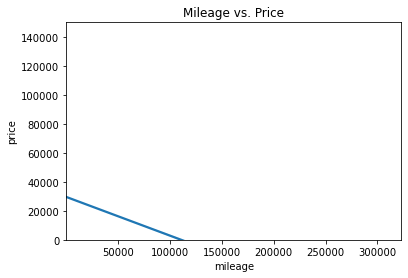

In [15]:
#now we will see it clearly: Mileage vs. Price
(sns.regplot(data=audi, x='mileage', y='price', scatter=False)).set(ylim=(0,150000))
plt.savefig('audi_mile_price_reg.png')
ax = plt.gca()
ax.set_title("Mileage vs. Price")

Text(0.5, 1.0, 'MPG vs. Price')

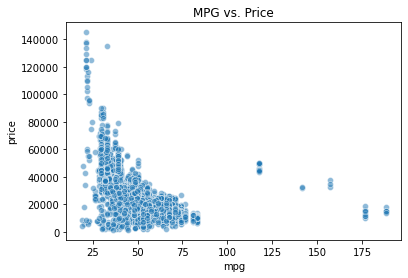

In [19]:
# MPG vs. Price
sns.scatterplot(data=audi, x='mpg', y='price', alpha=0.5)
ax = plt.gca()
ax.set_title("MPG vs. Price")

#### Downward trend- The higher the mpg, the lower the price - you can see the opposite here

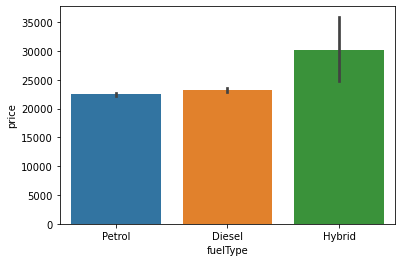

In [27]:
# Fuel Type vs. Price
sns.barplot(data=audi, x='fuelType', y='price')
plt.savefig('audi_fuel_price.png')

No handles with labels found to put in legend.


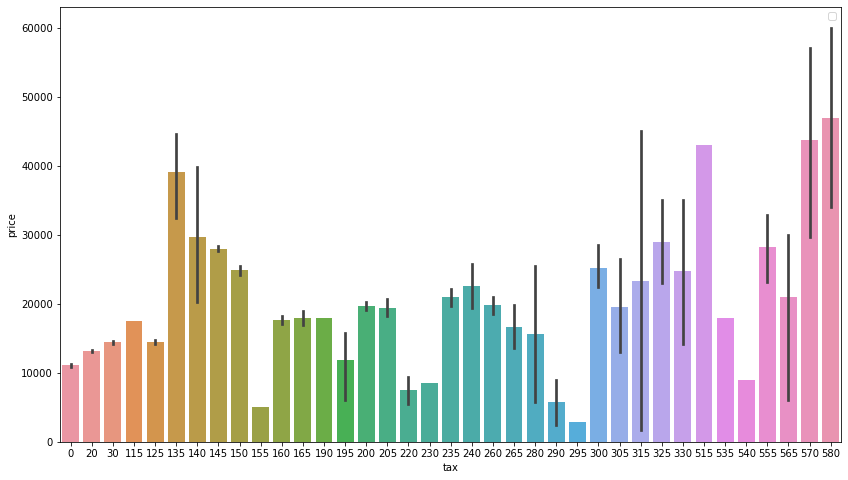

In [32]:
plt.figure(figsize=(14,8))
sns.barplot(data=audi, x='tax', y='price',)
plt.savefig('audi_tax_price.png')